In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import sklearn
import sys
import tensorflow as tf
import time
import random
import pathlib

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


training_path = pathlib.Path('./lol_data_1/training')
validation_path = pathlib.Path('./lol_data_1/valid')
test_path = pathlib.Path('./lol_data_1/test')

train_image_paths = list(training_path.glob('*/*'))  
valid_image_paths = list(validation_path.glob('*/*'))  
test_image_paths = list(test_path.glob('*/'))  

train_image_paths = [str(path) for path in train_image_paths]
valid_image_paths = [str(path) for path in valid_image_paths]
test_image_paths = [str(path) for path in test_image_paths]

random.shuffle(train_image_paths)
random.shuffle(valid_image_paths)
random.shuffle(test_image_paths)

train_image_count = len(train_image_paths)
valid_image_count = len(valid_image_paths)
test_image_count = len(test_image_paths)

print("Training Images -> ", train_image_count)
print("Validation Images -> ", valid_image_count)
print("Test Images -> ", test_image_count)

2.0.0
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
numpy 1.16.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf
Training Images ->  103748
Validation Images ->  26640
Test Images ->  148


In [2]:
train_image_paths[:5]

['lol_data_1\\training\\Evelynn\\19.jpg',
 'lol_data_1\\training\\Heimerdinger\\255.jpg',
 'lol_data_1\\training\\Sion\\542.jpg',
 'lol_data_1\\training\\Kennen\\570.jpg',
 'lol_data_1\\training\\Zoe\\431.jpg']

In [3]:
valid_image_paths[:5]

['lol_data_1\\valid\\XinZhao\\64.jpg',
 'lol_data_1\\valid\\Irelia\\81.jpg',
 'lol_data_1\\valid\\Viktor\\48.jpg',
 'lol_data_1\\valid\\Riven\\113.jpg',
 'lol_data_1\\valid\\Vayne\\68.jpg']

In [4]:
test_image_paths[:5]

['lol_data_1\\test\\RekSai.jpg',
 'lol_data_1\\test\\Gangplank.jpg',
 'lol_data_1\\test\\Kled.jpg',
 'lol_data_1\\test\\Ziggs.jpg',
 'lol_data_1\\test\\Katarina.jpg']

In [5]:
label_names = sorted(item.name for item in training_path.glob('*/') if item.is_dir())
label_names

['Aatrox',
 'Ahri',
 'Akali',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Aphelios',
 'Ashe',
 'AurelionSol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 'Chogath',
 'Corki',
 'Darius',
 'Diana',
 'DrMundo',
 'Draven',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'Fiddlesticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'JarvanIV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 'Kaisa',
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kennen',
 'Khazix',
 'Kindred',
 'Kled',
 'KogMaw',
 'Leblanc',
 'LeeSin',
 'Leona',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'MasterYi',
 'MissFortune',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nidalee',
 'Nocturne',
 'Nunu',
 'Olaf',
 'Orianna',
 'Ornn',
 'Pantheon',
 'Poppy',
 'Pyke',
 'Qiyana',
 'Quinn

In [6]:
training_image_labels = [pathlib.Path(path).parent.name for path in train_image_paths]
for image, label in zip(train_image_paths[:5], training_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_1\training\Evelynn\19.jpg  --->   Evelynn
lol_data_1\training\Heimerdinger\255.jpg  --->   Heimerdinger
lol_data_1\training\Sion\542.jpg  --->   Sion
lol_data_1\training\Kennen\570.jpg  --->   Kennen
lol_data_1\training\Zoe\431.jpg  --->   Zoe


In [7]:
train_labels_info = []
for image_path, label in zip(train_image_paths, training_image_labels):
    train_labels_info.append((image_path, label))

In [8]:
import pprint
pprint.pprint(train_labels_info[:5])

[('lol_data_1\\training\\Evelynn\\19.jpg', 'Evelynn'),
 ('lol_data_1\\training\\Heimerdinger\\255.jpg', 'Heimerdinger'),
 ('lol_data_1\\training\\Sion\\542.jpg', 'Sion'),
 ('lol_data_1\\training\\Kennen\\570.jpg', 'Kennen'),
 ('lol_data_1\\training\\Zoe\\431.jpg', 'Zoe')]


In [9]:
valid_image_labels = [pathlib.Path(path).parent.name for path in valid_image_paths]
for image, label in zip(valid_image_paths[:5], valid_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_1\valid\XinZhao\64.jpg  --->   XinZhao
lol_data_1\valid\Irelia\81.jpg  --->   Irelia
lol_data_1\valid\Viktor\48.jpg  --->   Viktor
lol_data_1\valid\Riven\113.jpg  --->   Riven
lol_data_1\valid\Vayne\68.jpg  --->   Vayne


In [10]:
valid_labels_info = []
for image_path, label in zip(valid_image_paths, valid_image_labels):
    valid_labels_info.append((image_path, label))

In [11]:
pprint.pprint(valid_labels_info[:5])

[('lol_data_1\\valid\\XinZhao\\64.jpg', 'XinZhao'),
 ('lol_data_1\\valid\\Irelia\\81.jpg', 'Irelia'),
 ('lol_data_1\\valid\\Viktor\\48.jpg', 'Viktor'),
 ('lol_data_1\\valid\\Riven\\113.jpg', 'Riven'),
 ('lol_data_1\\valid\\Vayne\\68.jpg', 'Vayne')]


In [12]:
test_image_labels = [path.split('\\')[2].split('.')[0] for path in test_image_paths]
for image, label in zip(test_image_paths[:5], test_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_1\test\RekSai.jpg  --->   RekSai
lol_data_1\test\Gangplank.jpg  --->   Gangplank
lol_data_1\test\Kled.jpg  --->   Kled
lol_data_1\test\Ziggs.jpg  --->   Ziggs
lol_data_1\test\Katarina.jpg  --->   Katarina


In [13]:
test_labels_info = []
for image_path, label in zip(test_image_paths, test_image_labels):
    test_labels_info.append((image_path, label))

In [14]:
train_df = pd.DataFrame(train_labels_info)
valid_df = pd.DataFrame(valid_labels_info)
test_df = pd.DataFrame(test_labels_info)

train_df.columns = valid_df.columns =test_df.columns = ['filepath', 'class']

print(train_df.head())
print(valid_df.head())
print(test_df.head())

                                   filepath         class
0        lol_data_1\training\Evelynn\19.jpg       Evelynn
1  lol_data_1\training\Heimerdinger\255.jpg  Heimerdinger
2          lol_data_1\training\Sion\542.jpg          Sion
3        lol_data_1\training\Kennen\570.jpg        Kennen
4           lol_data_1\training\Zoe\431.jpg           Zoe
                          filepath    class
0  lol_data_1\valid\XinZhao\64.jpg  XinZhao
1   lol_data_1\valid\Irelia\81.jpg   Irelia
2   lol_data_1\valid\Viktor\48.jpg   Viktor
3   lol_data_1\valid\Riven\113.jpg    Riven
4    lol_data_1\valid\Vayne\68.jpg    Vayne
                        filepath      class
0     lol_data_1\test\RekSai.jpg     RekSai
1  lol_data_1\test\Gangplank.jpg  Gangplank
2       lol_data_1\test\Kled.jpg       Kled
3      lol_data_1\test\Ziggs.jpg      Ziggs
4   lol_data_1\test\Katarina.jpg   Katarina


In [15]:
height = 64
width = 64
channels = 3
batch_size = 128
num_classes = 148

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    #像素值 都除以255
    rescale = 1./255,
    # 图片随机旋转 (5度以内)
    rotation_range = 20,
    # 图片左右位移  20%限度以内
    width_shift_range = 0.2,
    # 图片上下位移  20%限度以内
    height_shift_range = 0.2,
    # 图像剪切强度
    shear_range = 0.2,
    # 图像缩放强度
    zoom_range = 0.2,
    # 是否水平翻转
    horizontal_flip = False,
    # 放大缩小吼， 像素填充方式
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_dataframe(train_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 2333,
                                                    shuffle = True,
                                                    class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
valid_generator = valid_datagen.flow_from_dataframe(valid_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 666,
                                                    shuffle = True,
                                                    class_mode = "categorical")

test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
test_generator = test_datagen.flow_from_dataframe(test_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 9727,
                                                    shuffle = True,
                                                    class_mode = "categorical")

Found 103748 validated image filenames belonging to 148 classes.
Found 26640 validated image filenames belonging to 148 classes.
Found 147 validated image filenames belonging to 148 classes.


In [16]:
train_num = train_generator.samples
valid_num = valid_generator.samples
test_num = test_generator.samples

print("Training Generator Sample -> ", train_num)
print("Validation Generator Sample -> ", valid_num)
print("Test Generator Sample -> ", test_num)

Training Generator Sample ->  103748
Validation Generator Sample ->  26640
Test Generator Sample ->  147


In [17]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(64, 64, 64, 3) (64, 148)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(64, 64, 64, 3) (64, 148)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(filters=16, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=16, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=64, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.5),
    
    keras.layers.Dense(num_classes, activation = 'softmax')
])

model.compile(loss="categorical_crossentropy",
             optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        1

In [19]:
logdir = './lol-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "face_recognition_model.h5")

callbacks = [
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

In [20]:
epochs = 20
#因为数据是generator 产生的 所以不能用fit函数
history = model.fit_generator(train_generator, steps_per_epoch=train_num // batch_size,
                             epochs=epochs, validation_data=valid_generator,
                             validation_steps=valid_num//batch_size)

Epoch 1/20
1621/1621 [==============================] - 503s 310ms/step - loss: 1.2871 - accuracy: 0.6726 - val_loss: 0.6152 - val_accuracy: 0.9082
Epoch 2/20
1621/1621 [==============================] - 372s 229ms/step - loss: 0.4199 - accuracy: 0.8781 - val_loss: 0.2512 - val_accuracy: 0.9541
Epoch 3/20
1621/1621 [==============================] - 190s 117ms/step - loss: 0.3191 - accuracy: 0.9081 - val_loss: 0.2824 - val_accuracy: 0.9559
Epoch 4/20
1621/1621 [==============================] - 191s 118ms/step - loss: 0.2808 - accuracy: 0.9221 - val_loss: 0.0569 - val_accuracy: 0.9881
Epoch 5/20
1621/1621 [==============================] - 195s 120ms/step - loss: 0.2651 - accuracy: 0.9292 - val_loss: 0.0849 - val_accuracy: 0.9892
Epoch 6/20
1621/1621 [==============================] - 197s 121ms/step - loss: 0.2524 - accuracy: 0.9348 - val_loss: 0.0618 - val_accuracy: 0.9912
Epoch 7/20
1621/1621 [==============================] - 190s 117ms/step - loss: 0.2374 - accuracy: 0.9402 - val_

In [21]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_' + label]
    
    pd.DataFrame(data).plot(figsize = (8,5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

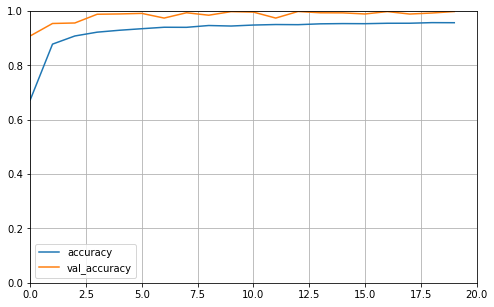

In [22]:
plot_learning_curves(history, 'accuracy', epochs, 0, 1)

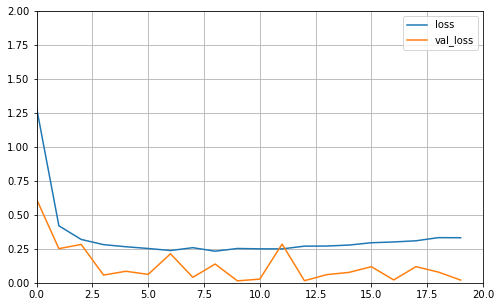

In [23]:
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [24]:
def load_and_preprocess_single_img(path):
    # read the img through file path
    image = tf.io.read_file(path)  
    image = tf.image.decode_jpeg(image, channels=3)
    # 原始图片大小为(128, 128, 3)，重设为(64, 64)
    image = tf.image.resize(image, [64, 64])  
    image = tf.cast(image, tf.float32) / 255.0  # 归一化到[0,1]范围
    image = np.expand_dims(image, axis = 0) # since you have batch_size, so you need to expand your image
    return image

In [25]:
def evaluate_single_pic(path, show=False):
    
    if show:
        import matplotlib.image as mpimg
        plt.imshow(mpimg.imread(path))
    image = load_and_preprocess_single_img(path)
    predict_result = model.predict(image)
    print("This is", label_names[np.argmax(predict_result, axis=1)[0]])

This is Leona


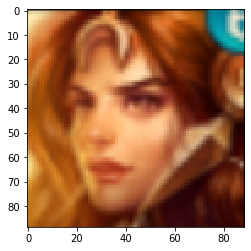

In [48]:
test_pic_path = "./lol_data_1/test_2/13.png"
evaluate_single_pic(test_pic_path, True)

This is Caitlyn


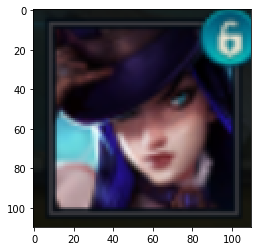

In [34]:
test_pic_path2 = "./lol_data_1/test_2/2.png"
evaluate_single_pic(test_pic_path2, True)

In [ ]:
test_accuracy = model.evaluate(test_generator)
print(test_accuracy)